# **Bibliotecas**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp


%matplotlib inline

In [3]:
def odeEuler(f,y0,t):
    '''Aproxima la solución de y'=f(y,t) por el método de Euler.
    
    Parámetros
    ----------
    f : La función dada por el lado derecho de la ecuación diferencial 
         y'=f(t,y), y(t_0)=y_0
    y0 : El valor inicial de y al tiempo y(t0)=y0 
    t : Arreglo unidimensional de 1D. El tamaño del paso h = t[n+1] - t[n].
    
    Regresa
    -------
    y : 1D Arreglo con la aproximación de y[n] de la solución y(t_n) calculada 
    con el método de  Euler.
    '''
    # Definimos el arreglo para las soluciones del tamaño del tiempo de integración
    y = np.zeros(len(t))
    
    # La condición inicial que debe satisfacer la solución
    y[0] = y0
    
    # LA integración por el método de Euler
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

In [11]:
#Tomada la versión de Joshua Simon
# https://github.com/JoshuaSimon/Classic-Fourth-Order-Runge-Kutta-Method-RK4/blob/master/Four_Step_Runge_Kutta_ODE1.py

"""Four_Step_Runge_Kutta_ODE1.py 

Implementation of the classic fourth-order method also refered as the
"original" Runge–Kutta method. This method is an implicit four step
Runge-Kutta method which solves an intial value problem numerically. 
"""

from datetime import datetime
import matplotlib.pyplot as plt
from math import exp, sqrt 

__date__ = datetime(2019, 6, 6) # or version string or something
__author__ = "Joshua Simon"


def runge_kutta(f, x_0, y_0, h):
    """Four step Runge-Kutta method (RK4)
    Solves first order ODEs
    """
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

# **Ejercicio 1**


Resuelva la ecuación diferencial del oscilador de Van der Pol

$$\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}$$

donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal.
Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]

Definimos $dx / dt = v$ y reescribimos la ecuacuación diferencial de segundo orden como un sistema de ecuaciones de primer orden
$$\begin{equation*}
\frac{dx}{dt} = v = f_1(t) \\
\frac{dv}{dt} = \mu b v-x =  f_2(t)
\end{equation*}$$
donde $(1 - x^2) = b$
Entonces la ecuación anterior se puede escribir vectorialmente como \\

$$\begin{equation*}
\frac{d}{dt} \vec{y} = \begin{bmatrix}
0  \ \ \ \ 1 \\
-1 \ \ \  \mu b \\
\end{bmatrix} \vec{y} = A \vec{y} = \vec{F}(t, \vec{y}) = (f_1(t), f_2(t))
\end{equation*}$$
donde $$\begin{equation*}
\vec{y} = \begin{bmatrix}
x \\
v \\
\end{bmatrix}
\end{equation*}$$

mu = 0


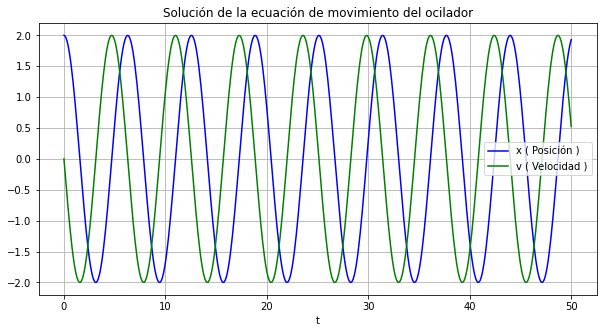

mu = 1


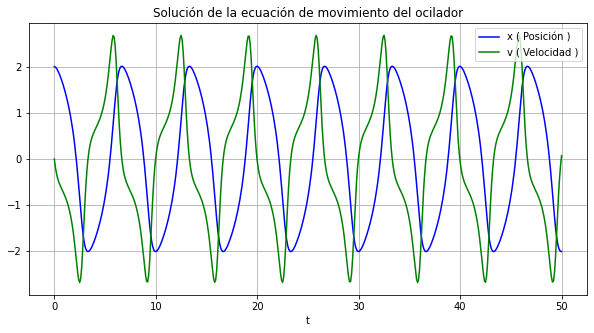

mu = 2


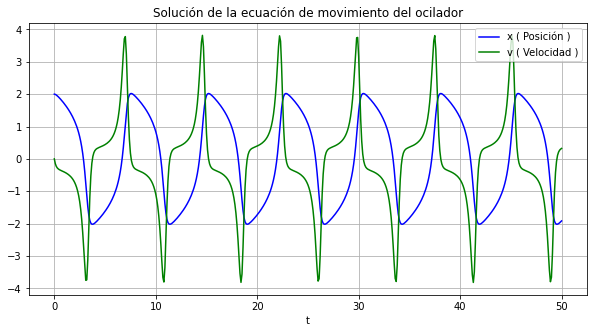

mu = 3


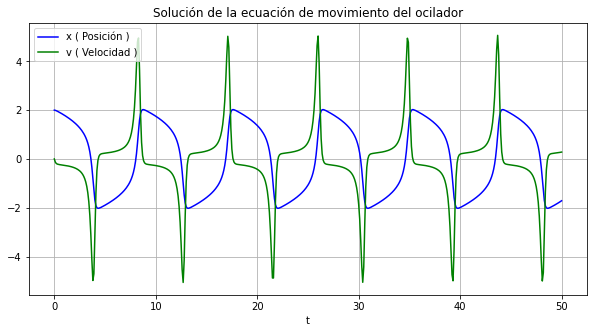

mu = 4


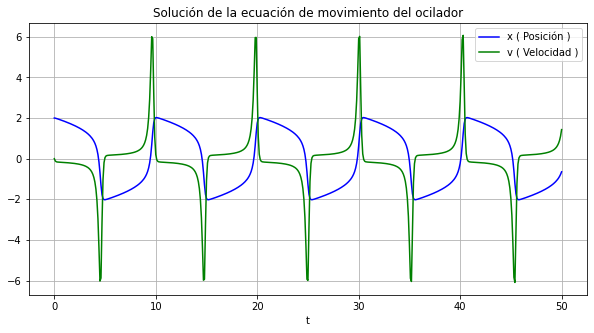

In [37]:
# Definimos la función F(t,y), el lado derecho de la ecuacion diferencial
# La solución y es un arreglo 1-D, y=(x, v), dy/dt es un arreglo

def oscilador(y, t, mu):
        x, v = y
        dydt = [v,-x +  mu*(1 - (x**2) )*v ]
        return dydt

# Definimos las condiciones iniciales del ocilador donde x = 2 , v = 0
y0 = [ 2 , 0 ]

# Definimos el tiempo de integración de 0 a 50 segundos (501 puntos, h=0.1)
t = np.linspace(0, 50, 501)

# mu varia entre : 0,1,2,3,4
mu = 0

for mu in range(0,5):

  y = odeint(oscilador, y0, t,args=(mu,)) 
  print('mu =', mu)
  plt.figure(figsize=(10,5))
  plt.plot(t, y[:, 0], 'b', label='x ( Posición )')
  plt.plot(t, y[:, 1], 'g', label='v ( Velocidad )')
  plt.legend(loc='best')
  plt.title('Solución de la ecuación de movimiento del ocilador')
  plt.xlabel('t')
  plt.grid()
  plt.show()


# **Ejercicio 2**

Siguiendo con el ejemplo anterior del oscilador de Van de Pol, reproduce la gráfica del plano fase ($\theta, \omega$) que aparece en la Wikipedia para distintos valores de $\mu$

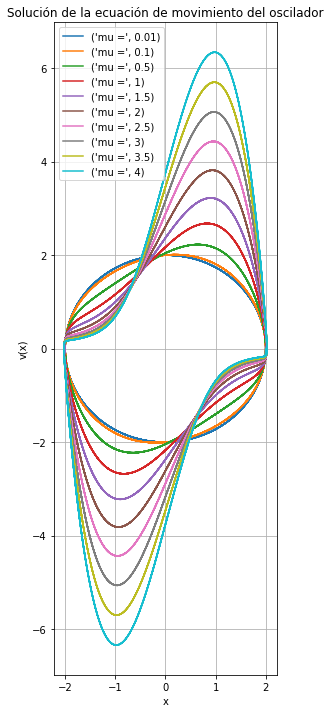

In [39]:
#Definimos el tiempo de integración de 0 a 50 segundos (5001 puntos, h=0.001)
t = np.linspace(0, 50, 5001)

# Usamos el método de integración de scipy.integrate.odeint
abserr = 1.0e-8
relerr = 1.0e-6
plt.figure(figsize=(4, 12))
for mu in [0.01 ,0.1, 0.5, 1, 1.5, 2, 2.5 , 3, 3.5,4]:
  y=odeint(oscilador, y0, t, args=(mu,), atol=abserr, rtol=relerr)
  plt.plot(y[:,0], y[:,1], label=('mu =', mu))
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador')
plt.xlabel('x')
plt.ylabel('v(x)')
plt.grid()
plt.show()

# **Ejercicio 3**

Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos: \\
Método de Euler \\
Método de Runge-Kutta RK4 \\
Función scipy.integrate.odeint ó scipy.integrate-solve_ivp



## **Ejercicio 3.1**  



$$\begin{equation*}
\frac{d^2 x}{dt^2} + k (\frac{dx}{dt})^2 -g = 0, \ x(0)=0, \ \frac{dx}{dt}(0). = 0, \ k\gt0.
\end{equation*}$$ \\
Definimos  $dx / dt = v$ y reescribimos la ecuación diferencial de segundo grado como un sistema de ecuaciones de primer orden
$$\begin{eqnarray*}
\frac{dx}{dt} = v = f_1(t)\\
\frac{dv}{dt} = -k v^2 + g = f_2(t)\\ 
\end{eqnarray*}$$ \\

La ecuación anterior se puede escribir vectorialmente como: \\

$$\begin{equation*}
\frac{d}{dt} \vec{y} = \vec{F}(t, \vec{y}) = (f_1(t), f_2(t))
\end{equation*}$$ \\

donde: \\

$$\begin{equation*}
\vec{y} = 
  \begin{bmatrix}
  x \\
  v \\
  \end{bmatrix}
\end{equation*}$$

In [6]:
# Definimos la primera ecuación

def ED1(y, t, k, g):
        x, v = y
        dydt = [v, -k*v**2 + g]
        return dydt

t = np.linspace(0, 2, 21)
t0 = 0
x0 = 0
v0 = 0

k = 1
g = 9.81

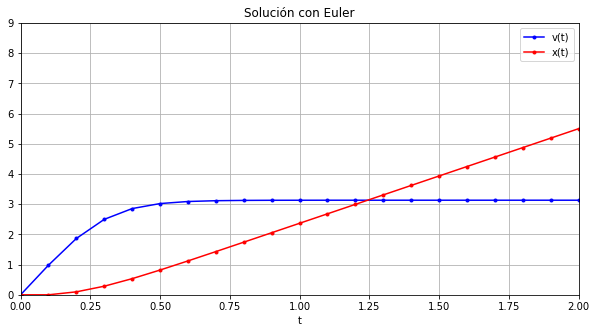

In [9]:
# Método de Euler
# Primera ecuación

f = lambda v,t: -k*v**2 + g 
v = np.zeros(len(t))
v[0] = v0
    
for n in range(0,len(t)-1):
  v[n+1] = v[n] + f(v[n],t[n])*(t[n+1] - t[n])

# Segunda ecuación

x = np.zeros(len(t))
x[0] = x0
    
for n in range(0,len(t)-1):
  x[n+1] = x[n] + v[n]*(t[n+1] - t[n])

# Gráfica

plt.figure(figsize=(10,5))
plt.plot(t,v,'b.-', t,x,'r.-')
plt.legend(['v(t)', 'x(t)'])
plt.title('Solución con Euler')
plt.axis([0,2,0,9])
plt.grid()
plt.xlabel('t')
plt.show()

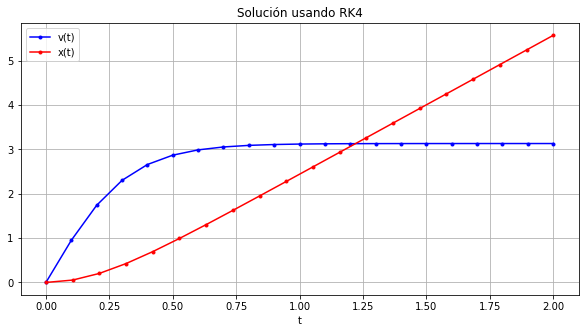

In [18]:
# Método RK4

a = 0
b = 2.0 
points = 20
h = (b-a)/points

t0 = 0
x0 = 0
v0 = 0
k = 1
g = 9.81
t=0
v=0

# Para resolver la primera ecuación:

f = lambda t,v: -k*v**2 + g 

t_values = [t0]
v_values = [v0]

# Calcula la solución con RK4

for _ in range(points):
  t, v = runge_kutta(f, t, v, h)

  t_values.append(t)
  v_values.append(v)

# No se puede integrar la ecuación porque no hay una ecuacion que dependa de x y t
# Usamos solve_ivp

# definimos la función F de lado derecho de la ecuación.
def VanderPol(t,y,k,g):
      dydt = [y[1], -k*(y[1])**2 + g]
      return dydt

# Paso de integración h = (tf-ti)/points
t0=0
tf=2.0

# Condiciones iniciales 
t_0 = 0.0
y_0 = [x0, v0]

# Definimos el tiempo de integración
t = np.linspace(t0,tf,points)

abserr = 1.0e-8
relerr = 1.0e-6

sol = solve_ivp(lambda t, y, mu: VanderPol(t, y, k, g),(t0,tf), y0=y_0, 
                method='RK45', t_eval=t, args=(mu,), rtol=relerr, atol=abserr)
x=sol.y[0]

plt.figure(figsize=(10,5))
plt.plot(t_values,v_values,'b.-', label='v(t)')
plt.plot(t,x,'r.-', label='x(t)')
plt.legend(loc='best')
plt.grid()
plt.title("Solución usando RK4")
plt.xlabel('t')
plt.show()

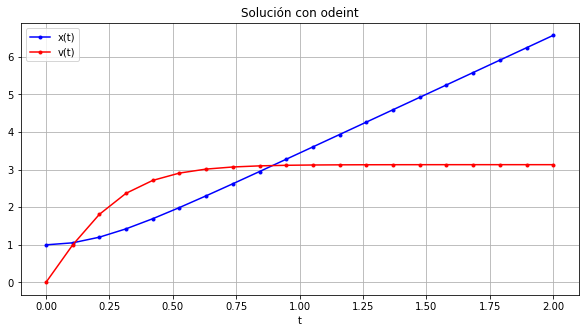

In [40]:
# Método con la función scipy.integrate.odeint

t0 = 0
tf = 2.0
points = 20

t = np.linspace(t0,tf,points)

# Definimos las condiciones iniciales 
x_0 = 0.0
a_0 = [1.0, 0.0]

# Definimos los errores de tolerancia 
abserr = 1.0e-8
relerr = 1.0e-6

sol=odeint(ED1, a_0, t, args=(k,g), atol=abserr, rtol=relerr)

y1=sol[:,0]
y2=sol[:,1]

plt.figure(figsize=(10,5))
plt.plot(t, y1, 'b.-', label='x(t)')
plt.plot(t, y2, 'r.-', label='v(t)')
plt.legend(loc='best')
plt.title('Solución con odeint')
plt.xlabel('t')
plt.grid()
plt.show()

## **Ejercicio 3.2**



$$\begin{equation*}
\frac{d^2 y}{d x^2} + \frac{2}{x} \frac{dy}{dx} + y^5 =0, \ y(0) = 1, \ \frac{dy}{dx}(0)=0. 
\end{equation*}$$ \\
Definimos $dy / dx = v$ y reescribimos la ecuación diferencial de segundo grado como un sistema de ecuaciones de primer orden
$$\begin{eqnarray*}
\frac{dy}{dx} = v = f_1(x)\\
\frac{dv}{dx} = -\frac{2}{x}v -y^5 = f_2(x)\\ 
\end{eqnarray*}$$
La ecuación anterior se puede escribir vectorialmente como
$$\begin{equation*}
\frac{d}{dt} \vec{a}   = \vec{F}(x, \vec{a}) = (f_1(t), f_2(t))
\end{equation*}$$
donde $$\begin{equation*}
\vec{a} = \begin{bmatrix}
y \\
v \\
\end{bmatrix}
\end{equation*}$$
No podemos usar ni el método de Euler ni el método de Runge-Kutta porque las ecuaciones de primer orden no dependen unicamente de 2 variables.

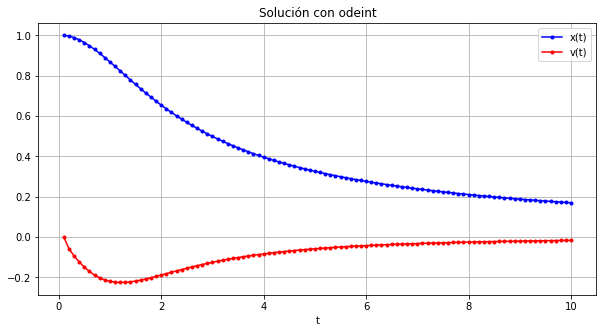

In [44]:
# Función scipy.integrate.odeint

# Primero definimos la ecuación:
def ED2(a, x):
        y, v = a
        dadx = [v, -(2/x)*v -y**5]
        return dadx

x0 = 0.1
y0 = 1.0
v0 = 0
x = np.linspace(0.1, 10.0, 100)

# Definimos las condiciones iniciales 
x_0 = x0
a_0 = [y0, v0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

sol = odeint(ED2, a_0, x, atol=abserr, rtol=relerr)

#print(t)
#print(sol[:,0],sol[:,1])

# La solución regresa ambas x(t) y v(t)
y1=sol[:,0]
y2=sol[:,1]

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'b.-', label='x(t)')
plt.plot(x, y2, 'r.-', label='v(t)')
plt.legend(loc='best')
plt.title('Solución con odeint')
plt.xlabel('t')
plt.grid()
plt.show()

## **Ejercicio 3.3:**


$$\begin{equation*}
\frac{d^3 y}{d x^3} = (x-1)^2 + y^2 + \frac{dy}{dx} -2, \ y(0)=1, \ y'(0)=0, \ y''(0)=2.
\end{equation*}$$ \\
Definimos $dy / dx = v$ y reescribimos la ecuación diferencial de segundo grado como un sistema de ecuaciones de primer orden \\

$$\begin{equation*}
\frac{dy}{dx}= v = f_1(x)\\
\frac{dv}{dx}= a = f_2(x)\\
\frac{da}{dx}= (x-1)^2 + y^2 + v - 2 = f_3(x)\\ 
\end{equation*}$$ \\

La ecuación anterior se puede escribir vectorialmente como: \\

$$\begin{equation*}
\frac{d}{dx} \vec{b} = \vec{F}(x, \vec{b}) = (f_1(x), f_2(x), f_3(x))
\end{equation*}$$
donde: \\

$$\begin{equation*}
\vec{b} = 
  \begin{bmatrix}
  y \\
  v \\
  a \\
  \end{bmatrix}
\end{equation*}$$

No podemos usar ni el método de Euler ni el método de Runge-Kutta porque las ecuaciones de primer orden no dependen unicamente de 2 variables.

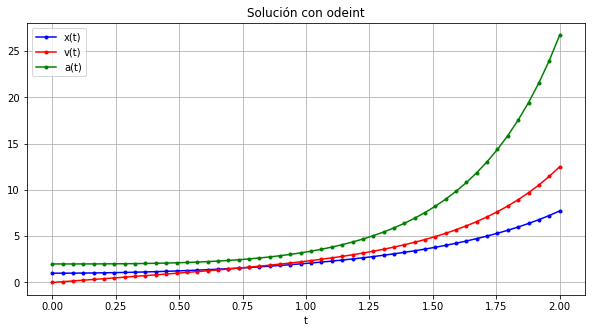

In [48]:
# Función scipy.integrate.odeint

# Primero definimos la ecuación:
def ED3(b, x):
        y, v, a = b
        dbdx = [v, a, (x-1)**2 + y**2 + v - 2]
        return dbdx

x0 = 0.0
y0 = 1.0
v0 = 0.0
a0 = 2.0
x = np.linspace(0.0, 2.0, 50)

# Definimos las condiciones iniciales 
x_0 = x0
a_0 = [y0, v0, a0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

sol=odeint(ED3, a_0, x, atol=abserr, rtol=relerr)
#print(t)
#print(sol[:,0],sol[:,1])

# La solución regresa ambas x(t) y v(t)
y1=sol[:,0]
y2=sol[:,1]
y3=sol[:,2]

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'b.-', label='x(t)')
plt.plot(x, y2, 'r.-', label='v(t)')
plt.plot(x, y3, 'g.-', label='a(t)')
plt.legend(loc='best')
plt.title('Solución con odeint')
plt.xlabel('t')
plt.grid()
plt.show()